# Home Alarm CLV

Prepare "Home Alarm, Inc.: Assessing Customer Lifetime Value" for class discussion and as an individual assignment and submit the assignment through GitLab. Be VERY clear about where results are coming from and what assumptions you are making in your Python code. It is in your best interest that we do not have to struggle to figure out where your numbers came from. The assignment (pdf) is on Canvas (week2/homealarm-clv.pdf). Example Excel calculations are also on Canvas (week1/aws-clv.xlsx and week1/notflix-cls.xlsx).

## Setup

Create a Jupyter notebook in which you calculate the CLV for a customer that uses auto-pay and for a customer that does not use auto-pay and answer question 1 through 4 in the assignment PDF.

## Hints

Add text motivating your work in Markdown format. Markdown is a simple formatting syntax for authoring HTML. For more details on using markdown go to http://commonmark.org/help/ for a 10-minute interactive Markdown tutorial

Please generate an HTML (Notebook) with your answers to all the questions listed in the homealarm-clv.pdf file on Canvas. When you have finished editing the jupyter notebook and havengenerated the HTML report make sure to save, commit, and push to GitLab. We will collect all files from GitLab after the due date.

Use File > Export Notebook As... > Export Notebook to HTML to get the html report and include to the jupyter notebook file and the HTML file in your submission.

## Analysis

The python dictionary below contains information about attrition notifications from the table on page 3 of the assignment PDF.

Note: GitLab will automatically tests if your work is fully reproducible each time you "push" changes (see .gitlab-ci.yml for the configuration). If you get an email from GitLab stating that there was an error, it suggests a problem in your code. Note that the setup for the Home Alarm assignment will *not* test if your analysis is correct. GitLab will only check if the code is valid and runs without issue in the docker container.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
churn = pd.DataFrame(
    {
        "autopay": [0.032, 0.070, 0.097, 0.103, 0.095, 0.078, 0.069, 0.059, 0.053],
        "no_autopay": [0.084, 0.122, 0.162, 0.154, 0.134, 0.120, 0.111, 0.096, 0.086],
    }
)

### Calculate CLV for autopay customers

In [4]:

#DF
d1={'Autopay CLV':['Revenue','Service Cost','Marketting Cost','Customer Profit','Churn rate','Prob.of being active at end of period','Profit expected on average','Discount','Present value of expected profits','CLV'],'Today-end of year 1':[0]*10}
d2=['Month %i' %i for i in range(1,97)]
df1=pd.DataFrame(data=d1)
df2=pd.DataFrame(0,index=np.arange(10),columns=d2)
apc=pd.concat([df1,df2],axis=1).set_index('Autopay CLV')

#Revenue
apc.loc['Revenue']=apc.loc['Revenue'].astype(float)
apc.loc['Revenue']['Month 1':'Month 12'] = 40
for i in range(13,97):
    p='Month %i' %i
    q='Month %i' %(i-12)
    apc.loc['Revenue'][p]=apc.loc['Revenue'][q]*1.03

#Service cost
apc.loc['Service Cost']=apc.loc['Revenue']*0.15

#Marketting cost
apc.loc['Marketting Cost']=apc.loc['Revenue']*0.05

#Customer Profit
apc.loc['Customer Profit']=apc.loc['Revenue']-apc.loc['Service Cost']-apc.loc['Marketting Cost']

#Churn
nc=churn['autopay'] 
apc.loc['Churn rate']['Today-end of year 1']=1
apc.loc['Churn rate']['Month 1']=nc[0]

for i in range(1,8):
    j=1 + i*12
    p='Month %i' %j
    apc.loc['Churn rate'][p]=nc[i]

#Prob of being active at the end of the period
apc.loc['Prob.of being active at end of period']['Today-end of year 1']=1
apc.loc['Prob.of being active at end of period']['Month 1']=apc.loc['Prob.of being active at end of period']['Today-end of year 1'] * (1-apc.loc['Churn rate']['Month 1'])
for i in range(3,98):
    p='Month %i' %(i-1)
    q='Month %i' %(i-2)
    apc.loc['Prob.of being active at end of period'][p]=apc.loc['Prob.of being active at end of period'][q] * (1-apc.loc['Churn rate'][p])
    
#Profit expected on average
apc.loc['Profit expected on average']=apc.loc['Customer Profit'] * apc.loc['Prob.of being active at end of period']

#Discount
apc.loc['Discount']=list(range(0,97))

#Present value of expected profits
apc.loc['Present value of expected profits']=apc.loc['Profit expected on average']/(1.00797414)**apc.loc['Discount']

#CLV
apc.loc['CLV']['Month 1']=apc.loc['Present value of expected profits']['Month 1']
for i in range(3,98):
    p='Month %i' %(i-1)
    q='Month %i' %(i-2)
    apc.loc['CLV'][p]=apc.loc['CLV'][q] + apc.loc['Present value of expected profits'][p]

CLV_apc=apc.round(decimals=3)

In [ ]:
# list your assumptions here
# 1) The contracts are on yearly basis and so if a person wishes not to continue the contract they still have to payout for the remaining year till the contract ends.
# 2) The churn out is considered year-on-year basis and the type of churn is optimistic churn as the billing is done at the end of the month
# 3) The annual discount rate is assumed to be 10% and the discounting is done monthly as the payments are monthly. 
# 4) The cohort under study is into its second year but the churn at the end of the first is 100% 
# 5) The installation charges are not considered in the calculation as the current cohort is entering second year the initial waiver of $297 would have been covered by the profits from the first year contract.
# 6) The churn of year 9 is not considered in the CLV calculation as it is the value for the people who disclose that they are not renewing the contract for year 10.
# 7) The calculation is done on -per customer- basis of the cohort and hence we are not assuming the number of people in the cohort.
# 8) Although historic initial RMR has been $30, due to the general rate changes the RMR is $40 and hence the same has been considered for the first year of the calculation. 
# 9) All the above assumptions are same for both groups- Auto pay and Non Auto pay.

In [5]:
#Question-1
#What is the CLV of the customer who uses autopay?
# calculate clv here
Autopay_CLV = apc.loc['CLV']['Month 96']
print(f"The CLV of a customer using autopay (8 years out) is {Autopay_CLV.round(2)}")

The CLV of a customer using autopay (8 years out) is 1745.94


### Calculate CLV for non-autopay customers

In [6]:

#DF
d3={'Non Autopay CLV':['Revenue','Service Cost','Marketting Cost','Customer Profit','Churn rate','Prob.of being active at end of period','Profit expected on average','Discount','Present value of expected profits','CLV'],'Today-end of year 1':[0]*10}
d4=['Month %i' %i for i in range(1,97)]
df3=pd.DataFrame(data=d3)
df4=pd.DataFrame(0,index=np.arange(10),columns=d4)
napc=pd.concat([df3,df4],axis=1).set_index('Non Autopay CLV')

#Revenue
napc.loc['Revenue']=napc.loc['Revenue'].astype(float)
napc.loc['Revenue']['Month 1':'Month 12'] = 40
for i in range(13,97):
    p='Month %i' %i
    q='Month %i' %(i-12)
    napc.loc['Revenue'][p]=napc.loc['Revenue'][q]*1.03

#Service cost
napc.loc['Service Cost']=napc.loc['Revenue']*0.15

#Marketting cost
napc.loc['Marketting Cost']=napc.loc['Revenue']*0.05

#Customer Profit
napc.loc['Customer Profit']=napc.loc['Revenue']-napc.loc['Service Cost']-napc.loc['Marketting Cost']

#Churn
nnc=churn['no_autopay'] 
napc.loc['Churn rate']['Today-end of year 1']=1
napc.loc['Churn rate']['Month 1']=nnc[0]

for i in range(1,8):
    j=1 + i*12
    p='Month %i' %j
    napc.loc['Churn rate'][p]=nnc[i]

#Prob of being active at the end of the period
napc.loc['Prob.of being active at end of period']['Today-end of year 1']=1
napc.loc['Prob.of being active at end of period']['Month 1']=napc.loc['Prob.of being active at end of period']['Today-end of year 1'] * (1-napc.loc['Churn rate']['Month 1'])

for i in range(3,98):
    p='Month %i' %(i-1)
    q='Month %i' %(i-2)
    napc.loc['Prob.of being active at end of period'][p]=napc.loc['Prob.of being active at end of period'][q] * (1-napc.loc['Churn rate'][p])
    
#Profit expected on average
napc.loc['Profit expected on average']=napc.loc['Customer Profit'] * napc.loc['Prob.of being active at end of period']

#Discount
napc.loc['Discount']=list(range(0,97))

#Present value of expected profits
napc.loc['Present value of expected profits']=napc.loc['Profit expected on average']/(1.00797414)**napc.loc['Discount']

#CLV
napc.loc['CLV']['Month 1']=napc.loc['Present value of expected profits']['Month 1']
for i in range(3,98):
    p='Month %i' %(i-1)
    q='Month %i' %(i-2)
    napc.loc['CLV'][p]=napc.loc['CLV'][q] + napc.loc['Present value of expected profits'][p]

CLV_napc=napc.round(decimals=3)

In [ ]:
# list your assumptions here ( Same as that of Auto pay group)
# 1) The contracts are on yearly basis and so if a person wishes not to continue the contract they still have to payout for the remaining year till the contract ends.
# 2) The churn out is considered year-on-year basis and the type of churn is optimistic churn as the billing is done at the end of the month
# 3) The annual discount rate is assumed to be 10% and the discounting is done monthly as the payments are monthly. 
# 4) The cohort under study is into its second year but the churn at the end of the first is 100% 
# 5) The installation charges are not considered in the calculation as the current cohort is entering second year the initial waiver of $297 would have been covered by the profits from the first year contract.
# 6) The churn of year 9 is not considered in the CLV calculation as it is the value for the people who disclose that they are not renewing the contract for year 10.
# 7) The calculation is done on -per customer- basis of the cohort and hence we are not assuming the number of people in the cohort.
# 8) Although historic initial RMR has been $30, due to the general rate changes the RMR is $40 and hence the same has been considered for the first year of the calculation. 
# 9) All the above assumptions are same for both groups- Auto pay and Non Auto pay.

In [7]:
#Question-2
#What is the CLV of the customer who does not use autopay?
# calculate clv here
No_autopay_CLV = napc.loc['CLV']['Month 96']
print(f"The CLV of a customer not using autopay (8 years out) is {No_autopay_CLV.round(2)}")

The CLV of a customer not using autopay (8 years out) is 1423.21


### Create a line graph of CLV for both autopay and non-autopay customer

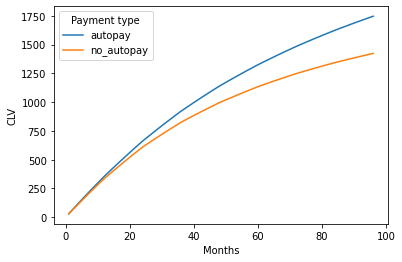

In [8]:
# enter your code here
clvplt=pd.DataFrame({'Months':list(range(0,97)),'autopay':CLV_apc.loc['CLV'],'no_autopay':CLV_napc.loc['CLV']}).reset_index()[1:98]
clvplt=pd.melt(clvplt, id_vars=['Months'], value_vars=['autopay', 'no_autopay'], var_name='Payment type', value_name='CLV')
clvplot=sns.lineplot(x="Months", y="CLV",hue='Payment type',data=clvplt)

### Create a line graph of the retention rate for both autopay and non-autopay customer 

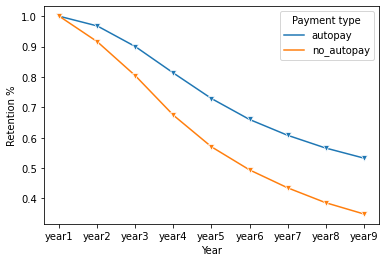

In [9]:
# enter your code here
year=['year1','year2','year3','year4','year5','year6','year7','year8','year9']
retention=pd.DataFrame({'Year':year,'autopay':CLV_apc.loc['Prob.of being active at end of period'].unique(),'no_autopay':CLV_napc.loc['Prob.of being active at end of period'].unique()})
retention=pd.melt(retention, id_vars=['Year'], value_vars=['autopay', 'no_autopay'], var_name='Payment type', value_name='Retention %')
retention['Retention %']=retention['Retention %']
rplot=sns.lineplot(x="Year", y="Retention %",hue='Payment type',data=retention,marker='v')

### Calculate the maximum amount to spend on autopay incentives

In [10]:
# Question-3
# What is the maximum amount home alarm should spend on incentives to convert an existing customer to autopay
max_pay = Autopay_CLV - No_autopay_CLV
print(f"Maximum amount to spend on autopay incentives is {max_pay.round(2)}")

Maximum amount to spend on autopay incentives is 322.73


### Suggested marketing actions

Suggest three marketing actions Home Alarm should consider to convert existing customers to autopay who are about to start their second year with Home Alarm. Be specific about incentive amounts you recommend using (if any)

In [ ]:
# Question-4

#1)
#The company shall ask the customers to sign up for auto pay at the initial contract signing by waiving off the $195 paid towards the installation charge. 
#Still the company will have a profit of $322.73-$195=$127.73 extra in the longer run of 9 years
#installation charge $495
#present waiver $297
#proposed waiver for auto-pay $195 (Full waiver)

# Evidence to prove the effectiveness of full waiver and against any possible loss

#Revenue first year = $480
#Customer profit after costs= $384
#Present value of is $349 at the end of year1

#Revenue from second year= ($480*1.03*96.8%)=$478.58
#Customer profit after costs= $379.7
#Present value of is $313.8 at the end of year1

#The net value if the customer continues into second year=$349+$314=$663

# The above calculation ascertains that if the customer signs up for auto pay and renews the contract for second year, there is no loss to the company because of full installation waiver.
# there is 3.2% chance of ($495-$349=$146) $146 loss as against 8.4% chance in the non auto pay category which is still negligible considering the miniscule probabililty and majority of cohort renewing the contract into the second year

#2)

# If for any reason, the company donot want to compromise on the partial installation charge of $195 up front and also to convert existing customers to autopay the company shall run a campaign that provides a cashback $200 if the customer signs up for autopay and renew the contract at the year. 
# $200 shall be provided as a gift card once the contract is renewed there by eliminating possible loss
#Revenue first year= $480
#Customer profit after costs= $384
#Present value of it is $349 at the end of year1
#Installation cost $297 ($492-$195) (Future value of $297 not calculated as it may be negligible and still the company would have recovered the initial expenses)

#Still the company will have a profit of $322.73-$200=$122.73 extra in the longer run of 9 years

#3) 

#Promising a fixed subscription of $40 as against 3% general increase in the subscription charges if the customer signs up for the autopay
#The CLV is $1615 8 years out as against $1423 in non autopay still providing the company extra $192 profits. 
#This option may seem like providing a little returns to the customers but the idea of fixed subscription charge which saves few dollars per month may be a proper USP for autopay campaign.

#4)
#Promising a discounted subscription of $30 as the subscription charges for next 1-2 years if the customer signs up for the autopay
#The i) 2years discounted charge of $30
#CLV is $1511 8 years out as against $1423 in non autopay still providing the company extra $88 profits. 
